In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tqdm import tqdm
from glob import glob
import random
from pathlib import Path

#### Auxiliar functions

In [2]:
def plot_sample(X):
    nb_rows = 3
    nb_cols = 3
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(6, 6))

    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].imshow(X[random.randint(0, X.shape[0])-1])

In [3]:
def read_data(path_list, im_size=(128,128)):
    
    X = []
    
    for path in path_list :
        for im_file in tqdm(glob(path + '*/*')):
            try:
                im = cv2.imread(im_file)
                im = cv2.resize(im, im_size,interpolation=cv2.INTER_LINEAR)
                im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
                X.append(im)
            except Exception as e:
                # In case annotations or metadata are found
                print("Not a picture")
    
    X = np.array(X)
    
    return X

#### Experimental constants

In [4]:
IM_SIZE = (256, 256)
IM_PATH = 'eden_data/Tomato/' #path the tomato image data
IM_PATH2 = 'eden_data/nightshade/' #path the nightshade image data
PATH_LIST= ['eden_data/Tomato/','eden_data/nightshade/']

100%|██████████| 123/123 [00:27<00:00,  4.47it/s]


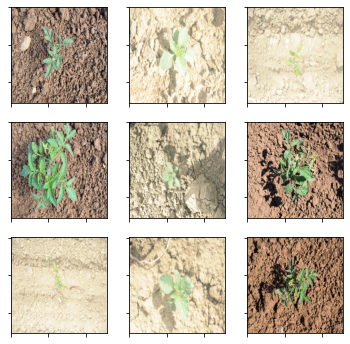

In [5]:
#define the path names in an OS agnostic way.
data_path1 = str(Path(Path.cwd()).parents[1].joinpath((IM_PATH)))
data_path2 = str(Path(Path.cwd()).parents[1].joinpath((IM_PATH2)))
path_list=[data_path1,data_path2] #merge different paths in a path_list.
X=read_data(path_list,IM_SIZE)
plot_sample((X))

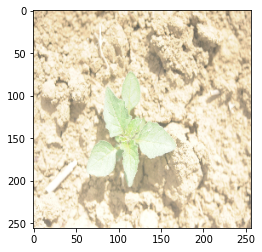

In [6]:
SAMPLE_IMAGE_INDEX = 250
im_sample = X[SAMPLE_IMAGE_INDEX]
plt.imshow(im_sample)
plt.show()

In [7]:
print(len(X))
print(type(X))
X=np.array(X)
print(type(X))
#plot_sample((X))

323
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
